In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, roc_auc

from matplotlib_inline import backend_inline
import seaborn as sns

backend_inline.set_matplotlib_formats('svg')
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

<AxesSubplot: >

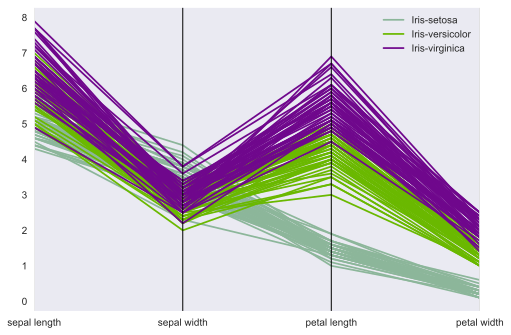

In [3]:
pd.plotting.parallel_coordinates(frame=data, class_column='class')

In [4]:
X, y = data.loc[:, ['sepal length', 'sepal width', 'petal length', 'petal width']], data.iloc[:, 4]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 人工搜索

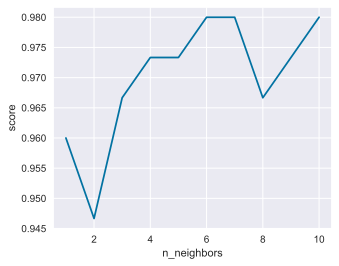

In [6]:
N = [i for i in range(1, 11)]
score = []
for n in N:
    model = KNeighborsClassifier(n_neighbors=n)
    score.append(cross_val_score(model, X, y, cv=5).mean())
plt.figure(figsize=(5, 4))
plt.plot(N, score)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

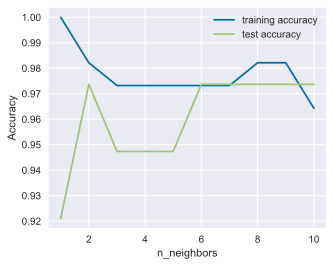

In [7]:
neighbors = range(1, 11)
train_acc, test_acc = [], []
for n_neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=n_neighbor)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

fig = plt.figure(figsize=(5, 4))
plt.plot(neighbors, train_acc, label="training accuracy")
plt.plot(neighbors, test_acc, label="test accuracy")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 机器搜索

In [8]:
param = {'n_neighbors': range(1, 11)}
gs = GridSearchCV(KNeighborsClassifier(), param_grid=param, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [9]:
gs.cv_results_

{'mean_fit_time': array([0.00159278, 0.00139928, 0.00097222, 0.00119996, 0.00120006,
        0.00100017, 0.00119977, 0.00120001, 0.00119996, 0.00119991]),
 'std_fit_time': array([4.81296185e-04, 4.93080887e-04, 3.46271777e-05, 3.99827971e-04,
        4.00018820e-04, 2.61174468e-07, 3.99446502e-04, 4.00042601e-04,
        4.00185596e-04, 4.00090257e-04]),
 'mean_score_time': array([0.00200281, 0.0020256 , 0.00199761, 0.00140004, 0.00199995,
        0.00179992, 0.00160022, 0.00159993, 0.00159965, 0.0014009 ]),
 'std_score_time': array([6.32523270e-04, 3.26502906e-05, 6.32120840e-04, 8.00108915e-04,
        3.23406696e-07, 3.99994861e-04, 8.00645434e-04, 4.89901429e-04,
        4.89668477e-04, 4.89922170e-04]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbor

In [10]:
gs.cv_results_['param_n_neighbors'].data

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

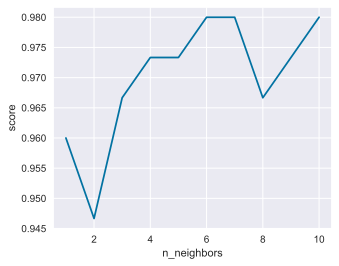

In [11]:
plt.figure(figsize=(5, 4))
plt.plot(gs.cv_results_['param_n_neighbors'].data, gs.cv_results_['mean_test_score'], label='test_score')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [12]:
f"最优参数：{gs.best_params_}"

"最优参数：{'n_neighbors': 6}"

In [13]:
model = gs.best_estimator_    # 最优模型

D:\Miniconda\envs\PyTorch\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


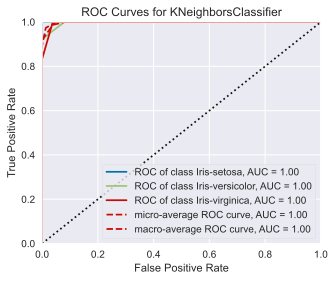

In [14]:
plt.figure(figsize=(5, 4))
roc_auc(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
plt.show()

### 手写KNN

In [15]:
from Model.KNN import KNNClassfication
import torch

In [16]:
data = pd.read_csv(r'data/Demo3/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data['class_'] = data['class'].map({
    'Iris-setosa': 0, 
    'Iris-versicolor': 1, 
    'Iris-virginica': 2
})

In [17]:
X, y = torch.from_numpy(data.iloc[:, : 4].to_numpy()), torch.from_numpy(data.iloc[:, 5].to_numpy())
X_train, X_test, y_train, y_test = train_test_split(X, y)

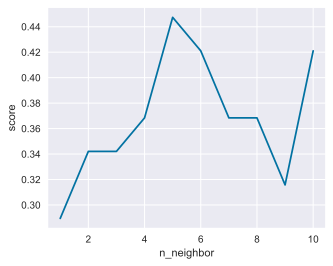

In [18]:
n_neighbor = range(1, 11)
acclst = []
for n in n_neighbor:   
    y_pred = KNNClassfication(X_train, y_train, X_test, K=n, n_class=3)
    num = X.shape[0] # 样本总数
    num_train = X_train.shape[0] # 训练集样本数目
    num_test = num - num_train # 测试集样本数目
    acc = sum(y_pred == y_test) / num_test
    acclst.append(acc)

plt.figure(figsize=(5, 4))
plt.plot(n_neighbor, acclst)
plt.xlabel('n_neighbor')
plt.ylabel('score')
plt.show()